## Frequency Analysis from GOLF Velocity Series

In [9]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import apollinaire as apn
import seaborn as sns

In [2]:
# Open file and display header data
filename = '/home/chrisl2324/Downloads/GOLF_22y_MEAN.fits'
file = fits.open(filename)
file[0].header 

SIMPLE  =                    T / Written by IDL:  Mon Oct  8 12:42:54 2018      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =             34711200 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2018-10-08'         / Creation UTC (CCCC-MM-DD) date of FITS header  
DATA    = 'GOLF velocity series (mean of PM1 and PM2)' /Solar Oscillations      
JDSTART =              2450184 /Starting data (julian day)                      
JDEND   =              2458219 /Ending data (julian day)                        
INSTRUME= 'GOLF    '           /Instrument                                      
CADENCE =              20.0000 /temporal cadence (sec)                          
CALIBRAT= 'Appourchaux et al (2018)' /Calibration method                        
COMMENT FITS (Flexible Image

In [33]:
with fits.open(filename) as f:
    data = f[0].data
    jd_start = f[0].header['JDSTART']
    jd_end = f[0].header['JDEND']

jd_values = jd_start + (jd_end - jd_start) * (np.arange(len(data)) / len(data))
data_reduced1 = data[:100_000]
jd_reduced2 = jd_values[:100_000]

In [46]:
#extract frequency values
freq, psd = apn.psd.series_to_psd (data_reduced1, dt=20, correct_dc=True)
freq = freq*1e6
psd = psd*1e-6

(2000.0, 4500.0)

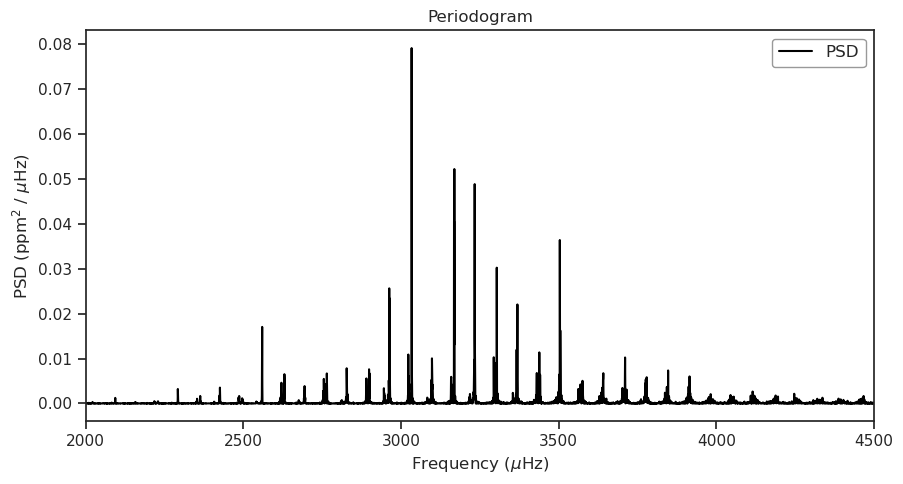

In [45]:
#plot frequencies
fig, ax = plt.subplots (figsize=(9,5))
sns.set_style("ticks")
sns.set_context("notebook")
ax.plot (freq, psd, color='k',label='PSD')
plt.title('Periodogram')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')
plt.tight_layout()
ax.legend(loc='upper right', fontsize=12, frameon=True, edgecolor='gray')
plt.xlim(2000, 4500)
#plt.savefig('/home/chrisl2324/golf_spectrum_new.png')

In [14]:
import os

#peakbagging process using 2 Harvey laws
dir_path = '/home/chrisl2324/golf_power_spectrum/'
apn.peakbagging.stellar_framework(
        freq, psd, r = 1, m = 1, teff = 5700, mcmcDir=dir_path,
        filename_back=os.path.join(dir_path, 'background.png'), 
        filemcmc_back=os.path.join(dir_path, 'mcmc_background.h5'),
        n_order=3, n_order_peakbagging=8, n_harvey=2,
        filename_pattern=os.path.join(dir_path, 'pattern.png'),
        filemcmc_pattern=os.path.join(dir_path, 'mcmc.h5'), 
        parallelise=False, quickfit=True,
        progress=True, power_law=True, low_cut=1000, high_cut_plaw=5000,
        a2z_file=os.path.join(dir_path, 'modes_param.a2z'), 
        fit_amp=True, 
        fit_splittings=False,
        format_cornerplot='png', 
        filename_peakbagging=os.path.join(dir_path, 'summary_peakbagging.png'), 
        dpi=300
    )

Beginning fit


100%|███████████████████████████████████████| 1000/1000 [00:39<00:00, 25.50it/s]
/home/chrisl2324/anaconda3/envs/apoll/lib/python3.11/site-packages/apollinaire/peakbagging/background.py:369: RuntimeWarning: divide by zero encountered in power
  return a * np.power (freq, -b)


Beginning fit


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 184.43it/s]


Orders to fit: 17, 18, 19, 20, 21, 22, 23, 24, 25
Fitting on order 17
Window width: 120.1 muHz, with low bound at 2464.5 muHz and up bound at 2584.6 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_17.h5


100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.43it/s]


Ensemble sampling achieved
Fitting on order 18
Window width: 120.7 muHz, with low bound at 2598.0 muHz and up bound at 2718.7 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_18.h5


100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.28it/s]


Ensemble sampling achieved
Fitting on order 19
Window width: 121.3 muHz, with low bound at 2731.7 muHz and up bound at 2853.1 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_19.h5


100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.58it/s]


Ensemble sampling achieved
Fitting on order 20
Window width: 121.9 muHz, with low bound at 2865.8 muHz and up bound at 2987.7 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_20.h5


100%|███████████████████████████████████████| 1000/1000 [00:41<00:00, 24.17it/s]


Ensemble sampling achieved
Fitting on order 21
Window width: 122.6 muHz, with low bound at 3000.1 muHz and up bound at 3122.6 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_21.h5


100%|███████████████████████████████████████| 1000/1000 [00:45<00:00, 22.19it/s]


Ensemble sampling achieved
Fitting on order 22
Window width: 123.2 muHz, with low bound at 3134.7 muHz and up bound at 3257.8 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_22.h5


100%|███████████████████████████████████████| 1000/1000 [00:45<00:00, 22.00it/s]


Ensemble sampling achieved
Fitting on order 23
Window width: 123.8 muHz, with low bound at 3269.5 muHz and up bound at 3393.3 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_23.h5


100%|███████████████████████████████████████| 1000/1000 [00:47<00:00, 21.10it/s]


Ensemble sampling achieved
Fitting on order 24
Window width: 124.4 muHz, with low bound at 3404.6 muHz and up bound at 3529.0 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_24.h5


100%|███████████████████████████████████████| 1000/1000 [00:47<00:00, 20.98it/s]


Ensemble sampling achieved
Fitting on order 25
Window width: 125.0 muHz, with low bound at 3540.0 muHz and up bound at 3665.0 muHz
Chain will be saved at: /home/chrisl2324/golf_power_spectrum/mcmc_sampler_order_25.h5


100%|███████████████████████████████████████| 1000/1000 [00:43<00:00, 22.88it/s]


Ensemble sampling achieved


<h1><center>Peakbagging Summary</h1>

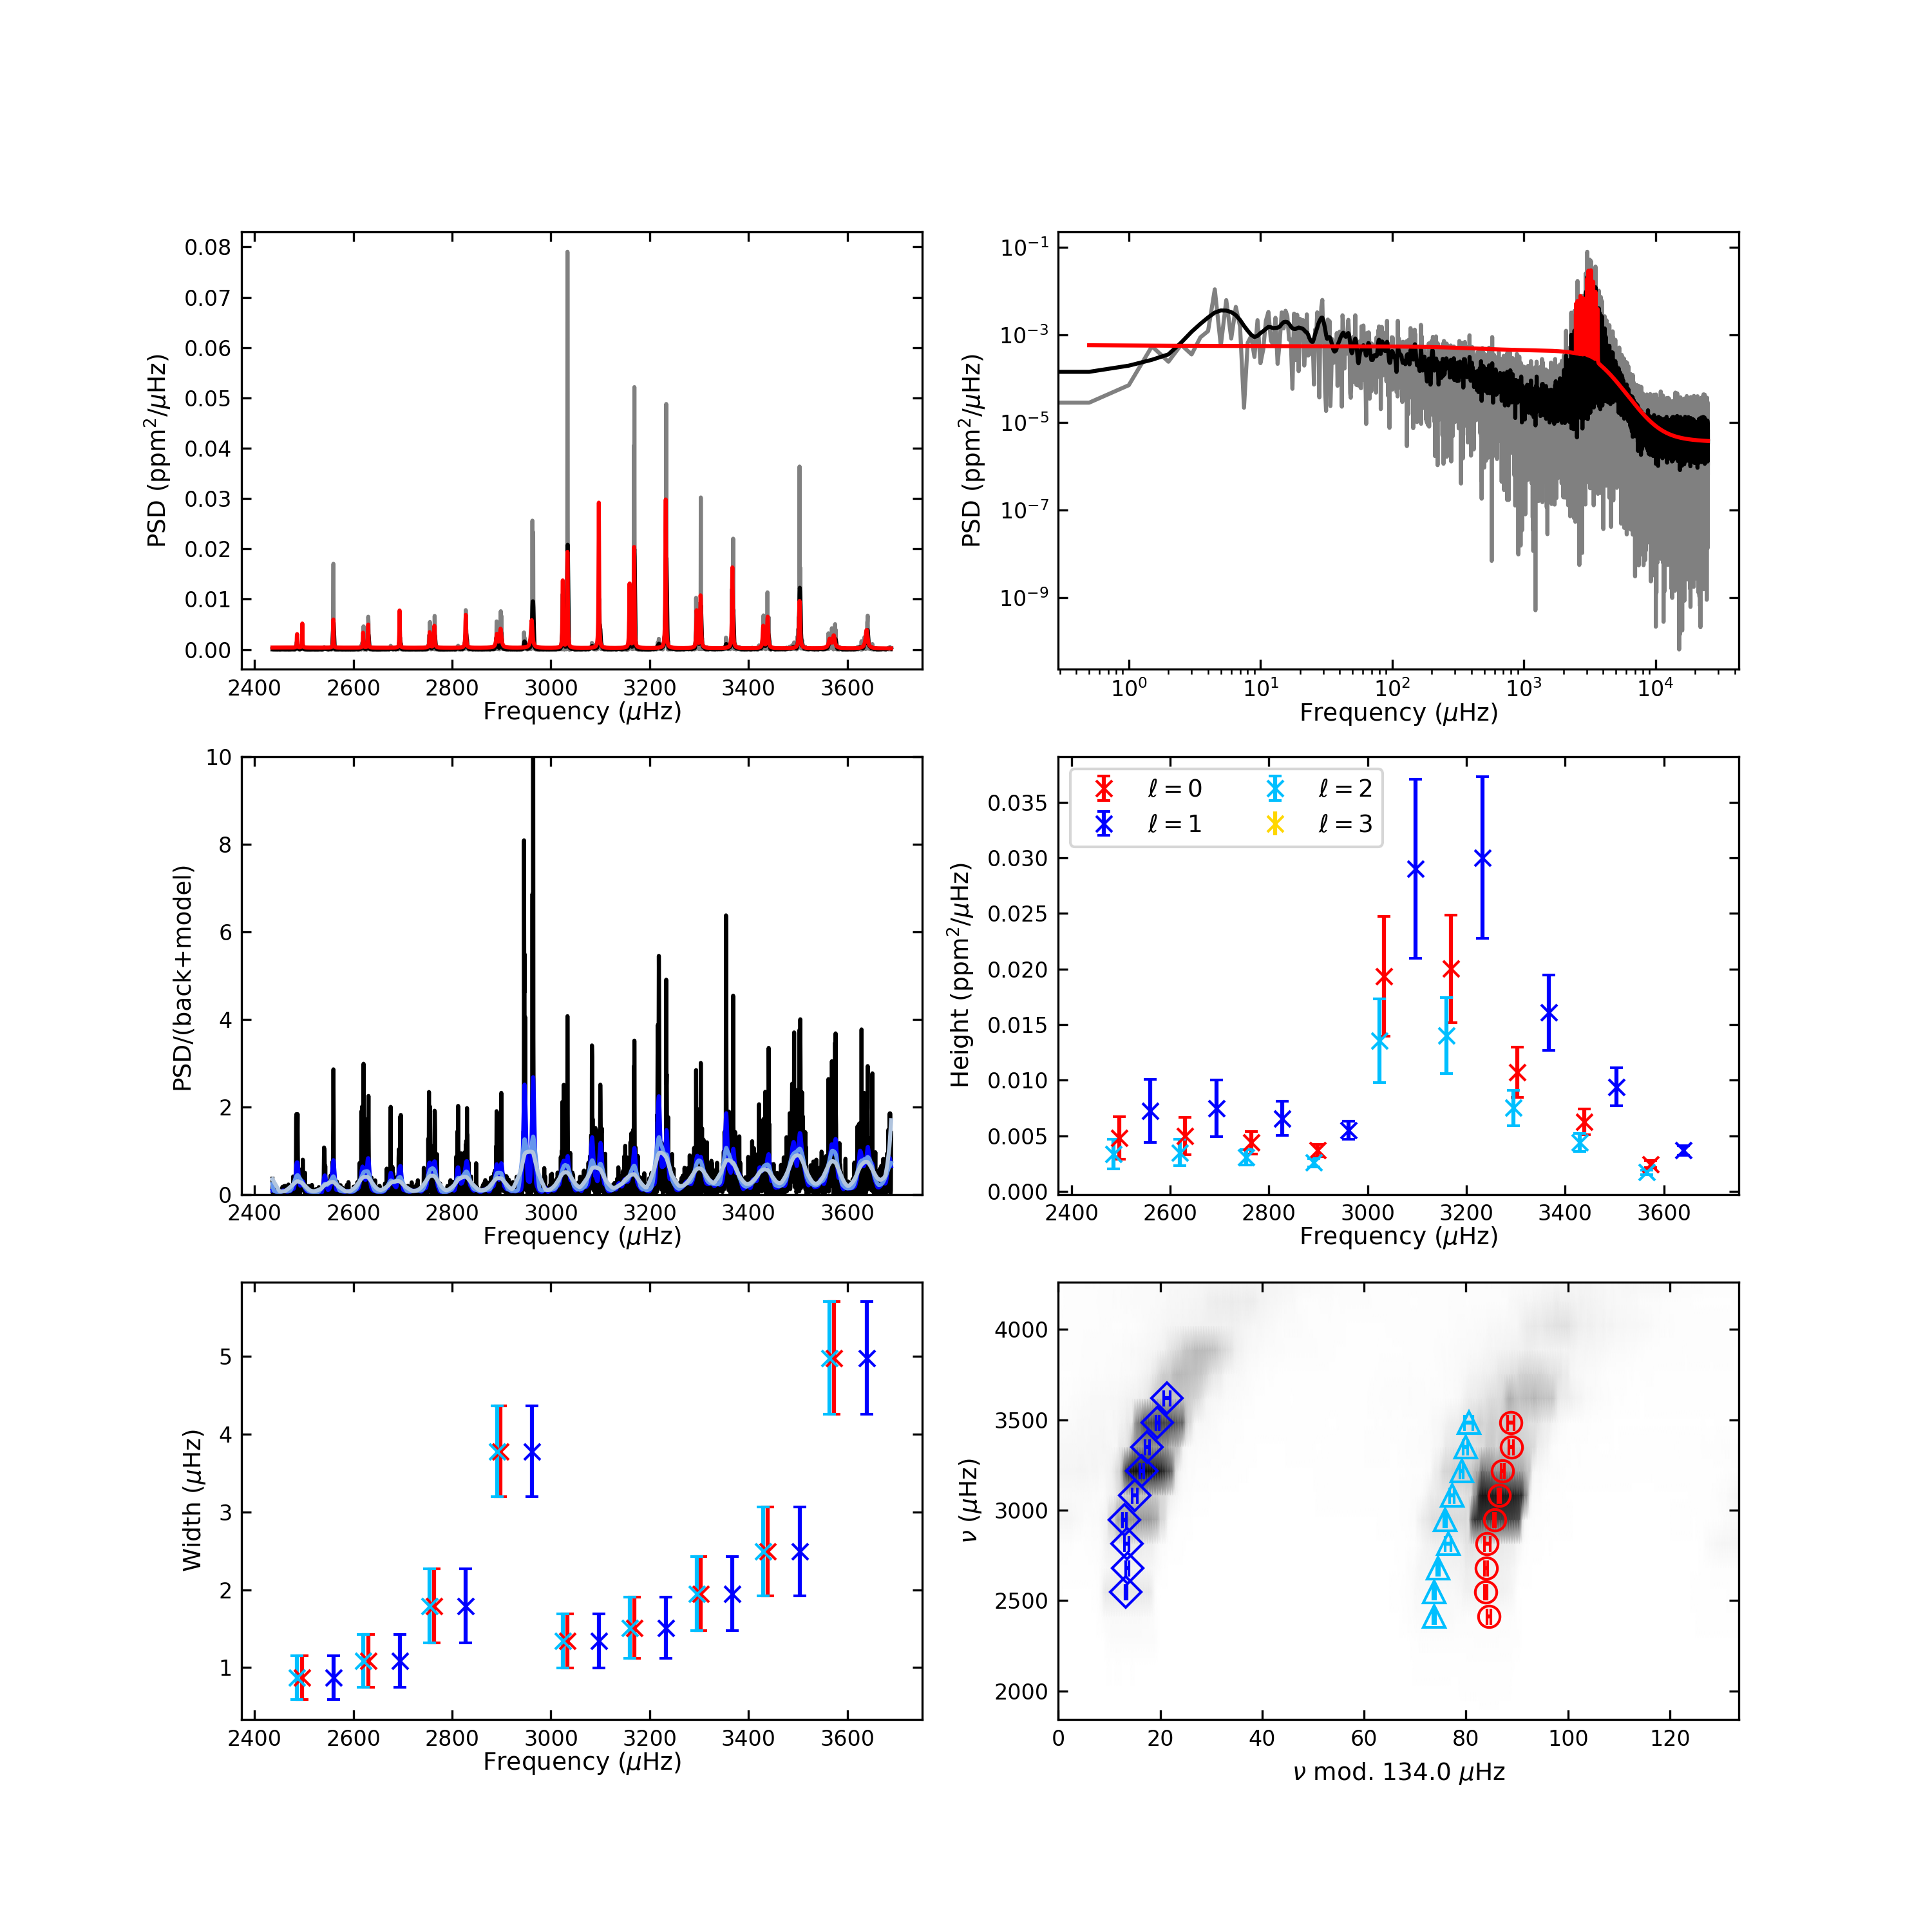

## Frequencies from Paper

In [11]:
import pandas as pd

df = pd.read_excel('~/Downloads/GOLF_Frequencies.xlsx')
df

,n,l = 0,l = 1,l = 2,l = 3,l = 4,l = 5
0,8,...,(1329.49 ± 0.64),(1393.51 ± 0.49),...,...,...
1,9,(1407.77 ± 0.32),1472.71 ± 0.13,(1535.95 ± 0.13),(1591.57 ± 0.80),...,...
2,10,1548.40 ± 0.04,1612.74 ± 0.08,1674.31 ± 0.21,(1729.68 ± 1.80),...,...
3,11,1686.54 ± 0.04,1749.29 ± 0.04,1810.17 ± 0.16,(1865.26 ± 1.37),...,...
4,12,1822.20 ± 0.05,1885.08 ± 0.04,1945.73 ± 0.09,(2001.21 ± 0.65),(2046.30 ± 1.50),...
5,13,1957.45 ± 0.06,2020.81 ± 0.04,2082.06 ± 0.07,2137.75 ± 0.19,(2187.40 ± 2.00),...
6,14,2093.51 ± 0.04,2156.80 ± 0.09,2217.80 ± 0.12,2273.23 ± 0.19,2321.94 ± 1.00,...
7,15,2228.69 ± 0.07,2291.80 ± 0.08,2352.32 ± 0.08,2407.85 ± 0.28,2460.10 ± 1.00,...
8,16,2362.69 ± 0.08,2425.48 ± 0.08,2485.89 ± 0.10,2541.65 ± 0.14,2593.70 ± 1.00,...
9,17,2496.04 ± 0.06,2559.21 ± 0.08,2619.64 ± 0.12,2676.19 ± 0.19,2730.00 ± 1.00,(2778.10 ± 0.50)


In [14]:
filename_pkb = '/home/chrisl2324/golf_power_spectrum/run_1/modes_param.pkb'
df_pkb = (pd.read_csv(filename_pkb, sep=' ', header=None, names=['N', 'L_value', 'Nu', 'sigma', 'Ampl.', 'sigma_Ampl.', 'width', 'sigma_width','angle', 'sigma_angle', 'split', 'sigma_split', 'asym', 'sigma_asym'], skiprows=13))

## Measured Frequencies

In [15]:
df_pkb

,N,L_value,Nu,sigma,Ampl.,sigma_Ampl.,width,sigma_width,angle,sigma_angle,split,sigma_split,asym,sigma_asym
0,16,2,2485.7775,0.2317,0.0034,0.0013,0.8705,0.2821,90.0,0.0,0.0,0.0,0.0,0.0
1,17,0,2496.4584,0.3797,0.0048,0.0019,0.8705,0.2821,90.0,0.0,0.0,0.0,0.0,0.0
2,17,1,2559.2637,0.1768,0.0072,0.0029,0.8705,0.2821,90.0,0.0,0.0,0.0,0.0,0.0
3,17,2,2619.7306,0.2772,0.0035,0.0012,1.0861,0.3392,90.0,0.0,0.0,0.0,0.0,0.0
4,18,0,2629.8407,0.2106,0.0050,0.0017,1.0861,0.3392,90.0,0.0,0.0,0.0,0.0,0.0
5,18,1,2693.5575,0.3731,0.0075,0.0025,1.0861,0.3392,90.0,0.0,0.0,0.0,0.0,0.0
6,18,2,2754.4954,0.2992,0.0031,0.0007,1.7926,0.4776,90.0,0.0,0.0,0.0,0.0,0.0
7,19,0,2763.9307,0.3104,0.0044,0.0010,1.7926,0.4776,90.0,0.0,0.0,0.0,0.0,0.0
8,19,1,2827.4474,0.4394,0.0066,0.0015,1.7926,0.4776,90.0,0.0,0.0,0.0,0.0,0.0
9,19,2,2890.5000,0.5480,0.0026,0.0004,3.7799,0.5845,90.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# extract frequencies from tables
frequency_l0 = df_pkb.loc[df_pkb['L_value'] == 0, 'Nu'].tolist()
frequency_l1 = df_pkb.loc[df_pkb['L_value'] == 1, 'Nu'].tolist()
frequency_l2 = df_pkb.loc[df_pkb['L_value'] == 2, 'Nu'].tolist()

In [25]:
# Extract frequencies from paper
paper_l0 = df['l = 0'][9:18]
paper_l1 = df['l = 1'][9:18]
paper_l2 = df['l = 2'][9:18]

# Helper function to get frequencies
def extract_frequencies(data_list):
    return [float(data.split('±')[0].strip()) for data in data_list]

# Parse frequencies
paper_freq_l0 = extract_frequencies(paper_l0)
paper_freq_l1 = extract_frequencies(paper_l1)
paper_freq_l2 = extract_frequencies(paper_l2)

In [23]:
# error function
import math

def error_measure(freq_measured, freq):
    '''Return error between measured value and value from
    Golf analysis'''
    error = (freq_measured - freq)/freq
    percent_error = error * 100
    return error

In [27]:
# Compute errors for each l-value
error_l0 = [abs(error_measure(f, p)) for f, p in zip(frequency_l0, paper_freq_l0)]
error_l1 = [abs(error_measure(f, p)) for f, p in zip(frequency_l1, paper_freq_l1)]
error_l2 = [abs(error_measure(f, p)) for f, p in zip(frequency_l2, paper_freq_l2)]

## Error Values

In [29]:
print("Errors for l = 0:")
print(", ".join(f"{error:.5f}" for error in error_l0))

print("\nErrors for l = 1:")
print(", ".join(f"{error:.5f}" for error in error_l1))

print("\nErrors for l = 2:")
print(", ".join(f"{error:.5f}" for error in error_l2))

Errors for l = 0:
0.00017, 0.00001, 0.00004, 0.00023, 0.00003, 0.00000, 0.00001, 0.00004, 0.00048

Errors for l = 1:
0.00002, 0.00011, 0.00020, 0.00078, 0.00037, 0.00025, 0.00033, 0.00011, 0.00020

Errors for l = 2:
0.05110, 0.04890, 0.04677, 0.04435, 0.04304, 0.04126, 0.03959, 0.03834, 0.03746
